In [71]:
## Para manejar DataFrame
import pandas as pd
import numpy as np
## Para hacer gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import datetime, requests
%matplotlib inline
## Para hacer análsis estadísticos
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.manifold import MDS


## Importacion del dataset

In [72]:
## Poblacion total
pob_tot = pd.read_excel("/home/mcorral/Eliot/pob_tot_10.xls")

## Poblacion instruida
pob_int = pd.read_excel("/home/mcorral/Eliot/pob_inst_10.xls")

## Poblacion con educacion
pob_edu = pd.read_excel("/home/mcorral/Eliot/pob_edu_10.xls")

## Poblacion con discapacidad
pob_dis = pd.read_excel("/home/mcorral/Eliot/pob_disc_10.xls")

## Poblacion Economicamente Activa al 2010
PEA = pd.read_excel("/home/mcorral/Eliot/PEA2010.xls")

## Proyeciones conapo Indicadores Demograficos
proy = pd.read_csv("/home/mcorral/Eliot/ind_dem_proyecciones.csv",encoding="iso-8859-15")

## Analisis de los datos
### Vamos a ver cual es la naturaleza de los datos, y que podemos observar de ellos.

#### Prorateo de los No especificados

In [4]:
#Poblacion de hombres por edades quinquenales
pob_tot_h = pob_tot[pob_tot['Sexo'] =='Hombres'][['Población total','Grupos quinquenales de edad']][['Población total','Grupos quinquenales de edad']].reset_index().drop(['index'], axis=1).rename(index=str, columns={"Población total": "Poblacion", "Grupos quinquenales de edad": "Edades"})
#Poblacion de mujeres por edades quinquenales
pob_tot_m = pob_tot[pob_tot['Sexo'] =='Mujeres'][['Población total','Grupos quinquenales de edad']][['Población total','Grupos quinquenales de edad']].reset_index().drop(['index'], axis=1).rename(index=str, columns={"Población total": "Poblacion", "Grupos quinquenales de edad": "Edades"})

In [5]:
Pob_tot_H = pob_tot_h[pob_tot_h['Edades'] !='Total'][pob_tot_h['Edades'] !='No especificado'][pob_tot_h['Poblacion'] != 54855231][pob_tot_h['Poblacion'] != 700219].reset_index().drop(['index'], axis=1)
Pob_tot_M = pob_tot_m[pob_tot_m['Edades'] !='Total'][pob_tot_m['Edades'] !='No especificado'][pob_tot_m['Poblacion'] != 57481307][pob_tot_m['Poblacion'] != 697187].reset_index().drop(['index'], axis=1)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [6]:
h = 54855231
Neh= 700219
H = h-Neh
m = 57481307
Nem = 697187
M = m-Nem

In [8]:
Pob_tot_H1 = Pob_tot_H[['Poblacion']]/H
Pob_tot_M1 = Pob_tot_M[['Poblacion']]/M

In [9]:
Pob_tot_H1

,Poblacion
0,0.098734
1,0.103484
2,0.102440
3,0.101932
4,0.088878
5,0.077665
6,0.074343
7,0.073211
8,0.061865
9,0.052153


In [10]:
Pob_tot_H1[['Poblacion']].sum()

Poblacion    1.0
dtype: float64

In [11]:
Pob_tot_H2 = Pob_tot_H1[['Poblacion']]*Neh
Pob_tot_M2 = Pob_tot_M1[['Poblacion']]*Nem

In [12]:
Pob_tot_H2

,Poblacion
0,69135.449190
1,72461.433751
2,71730.092632
3,71374.623765
4,62234.256207
5,54382.844722
6,52056.186430
7,51263.673944
8,43319.335254
9,36518.749838


In [13]:
Pob_tot_H3 = Pob_tot_H[['Poblacion']]+Pob_tot_H2
Pob_tot_M3 = Pob_tot_M[['Poblacion']]+Pob_tot_M2

In [14]:
Pob_tot_H['Hombres']=Pob_tot_H3
Pob_tot_M['Mujeres']=Pob_tot_M3

In [15]:
Pob_tot_H = Pob_tot_H.drop(['Poblacion'], axis=1)
Pob_tot_M = Pob_tot_M.drop(['Poblacion'], axis=1)

In [16]:
Pob_tot_H

,Edades,Hombres
0,00-04 años,5.416078e+06
1,05-09 años,5.676636e+06
2,10-14 años,5.619343e+06
3,15-19 años,5.591496e+06
4,20-24 años,4.875438e+06
5,25-29 años,4.260358e+06
6,30-34 años,4.078087e+06
7,35-39 años,4.016002e+06
8,40-44 años,3.393641e+06
9,45-49 años,2.860883e+06


### Juntamos tabla Hombres y Mujeres en una sola

In [17]:
Pob_tot = Pob_tot_H.merge(Pob_tot_M,
                         left_on='Edades',
                         right_on = 'Edades',
                         how = 'inner')

### Vamos a hacer algunas graficas

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/ticker.py:1437: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>



Text(0.5, 1.0, 'Distribucion poblacion por edad y sexo')

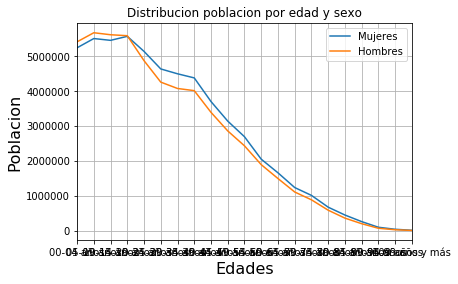

In [18]:
plt.plot(Pob_tot['Edades'],Pob_tot['Mujeres'],
         Pob_tot['Edades'],Pob_tot['Hombres'])
plt.xlim([0,20])
plt.locator_params(axis='x')
plt.locator_params(axis='y')
plt.xlabel('Edades',size=16)
plt.ylabel('Poblacion',size=16)
plt.grid()
plt.legend(['Mujeres','Hombres'])
plt.title('Distribucion poblacion por edad y sexo')
#plt.savefig('distripoblacionedadsexo.png',dpi=600)

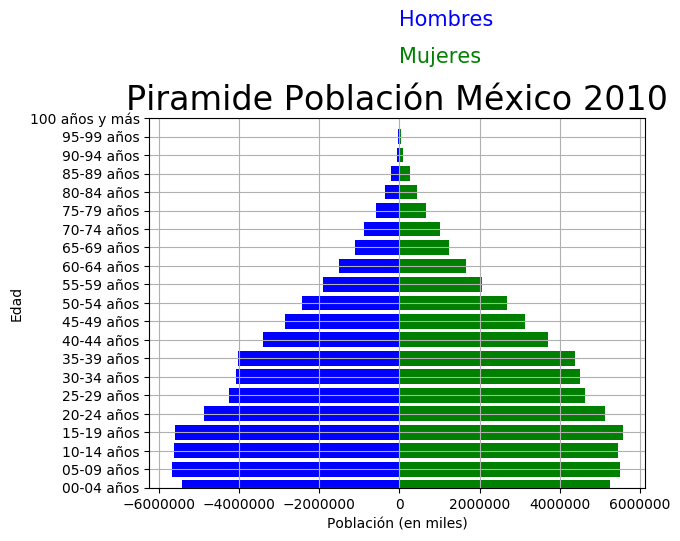

In [19]:
plt.rcdefaults()
fig,ax = plt.subplots()
y_pos = Pob_tot['Edades']
ax.barh(y_pos, Pob_tot['Mujeres'], align='center',
        color='green', ecolor='black')
ax.barh(y_pos,-Pob_tot['Hombres'],align='center',color='blue',ecolor='black')
ax.set_yticks(y_pos)
#ax.set_xticks([-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500,0,
#               500,1000,1500,2000,2500,3000,3500,400,])
#ax.set_xticklabels(['4','3.5','3','2.5','2','1.5','1','5','0'
#                    ,'.5','1','1.5','2','2.5','3','3.5','4'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Población (en miles)',size=10)
ax.set_ylabel('Edad')
ax.locator_params(axis='y',nbins=25)
plt.ylim(0,20)
ax.set_title('Piramide Población México 2010',size=24)
ax.grid(True)
plt.text(1500, 23, 'Mujeres',color='green',size=15)
plt.text(3000,25,'Hombres',color='blue',size=15)
plt.rcParams["figure.figsize"]=[12,7]
#plt.savefig('piramide2010.png')
plt.show()

### Poblacion instruida

### Análsis del contenido de la tabla de datos

In [73]:
#Poblacion de hombres por edades quinquenales
pob_Ins_h = pob_int[pob_int['SEXO'] =='Hombres'].reset_index().drop(['index'],axis=1)
#Poblacion de mujeres por edades quinquenales
pob_Ins_m = pob_int[pob_int['SEXO'] =='Mujeres'].reset_index().drop(['index'],axis=1)

In [74]:
Pob_INS = pob_Ins_h.append(pob_Ins_m).drop(['Pais'],axis=1)

In [75]:
# Tipo de variables
Var_d = ['SEXO','EDAD']
Var_c = [x for x in Pob_INS.columns if x not in Var_d]


#### A continuacion, vamos a escalar

In [76]:
sc = StandardScaler()
mm = MinMaxScaler()

In [77]:
sc.fit(Pob_INS[Var_c])
mm.fit(Pob_INS[Var_c])

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



MinMaxScaler(copy=True, feature_range=(0, 1))

In [78]:
Xs = pd.DataFrame(sc.transform(Pob_INS[Var_c]),columns=Var_c)
Xmm = pd.DataFrame(mm.transform(Pob_INS[Var_c]),columns=Var_c)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



### Análisis de componentes principales, y análisis factorial

In [79]:

pca = PCA(n_components=2)
mds = MDS(n_components=2)
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
Xmm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

In [81]:
Xp.corr()

,p1,p2
p1,1.000000e+00,-1.529957e-14
p2,-1.529957e-14,1.000000e+00


In [82]:
pca.explained_variance_ratio_

array([0.96391556, 0.01856174])

In [83]:
np.cumsum(pca.explained_variance_ratio_)

array([0.96391556, 0.9824773 ])

In [84]:
fa =FactorAnalyzer()

In [85]:
fa.analyze(Xs,2,rotation='varimax')

In [86]:
fa.loadings

,Factor1,Factor2
Población de 18 años y más,0.746457,0.663568
Sin educación superior,0.751485,0.656331
Tecnico1,0.810650,0.536899
Tecnico2,0.835562,0.544535
"Tecnico3,4",0.802407,0.557545
No especificado,0.798681,0.586082
Profesional1,0.758177,0.591045
Profesional2,0.738442,0.635610
Profesional3,0.762075,0.634815
Profesional4,0.726881,0.677865


In [87]:
pca =PCA()
pca.fit(Xs)
Xp=pd.DataFrame(pca.transform(Xs),columns=['p%d'%(i+1) for i in range(len(Xs.columns))])

In [88]:
pca.explained_variance_ratio_.cumsum()

array([0.96391556, 0.9824773 , 0.99418748, 0.99718912, 0.99853607,
       0.9994007 , 0.99967891, 0.99983236, 0.99993654, 0.99996775,
       0.99998403, 0.99999368, 0.99999789, 0.99999952, 1.        ,
       1.        ])

In [89]:
#La explicacion de la varianza es:
pca.explained_variance_ratio_.cumsum()

array([0.96391556, 0.9824773 , 0.99418748, 0.99718912, 0.99853607,
       0.9994007 , 0.99967891, 0.99983236, 0.99993654, 0.99996775,
       0.99998403, 0.99999368, 0.99999789, 0.99999952, 1.        ,
       1.        ])

### De la siguiente forma se acomglomeran los datos

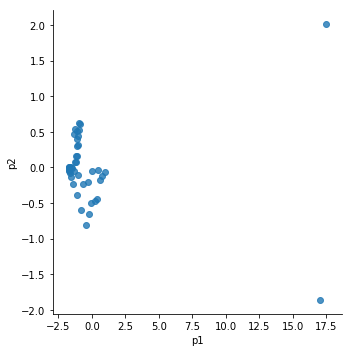

In [90]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

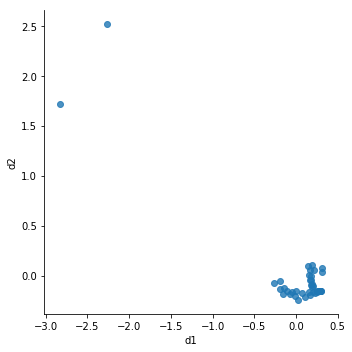

In [91]:
sns.lmplot(data=Xmm,x='d1',y='d2',fit_reg=False)

### Vamos a realizar unos clusters para ver patrones en los datos

In [92]:
l = []
for k in range(2,10):
    km =KMeans(n_clusters=k)
    km.fit(Xs)
    l.append(km.inertia_)

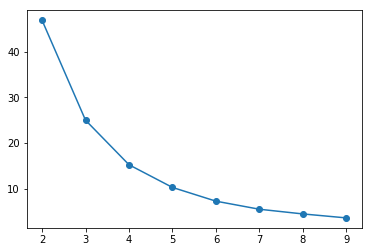

In [93]:
plt.plot(range(2,10),l,marker='o')

In [94]:
gmm = GaussianMixture(n_components=4)
gmm.fit(Xs)
Xp['cl'] = Xmm['cl'] = Pob_INS['cl'] = Xs['cl'] = gmm.predict(Xs)

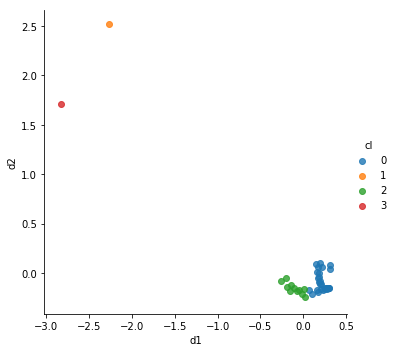

In [95]:
sns.lmplot(data=Xmm,x='d1',y='d2',fit_reg=False,hue='cl')

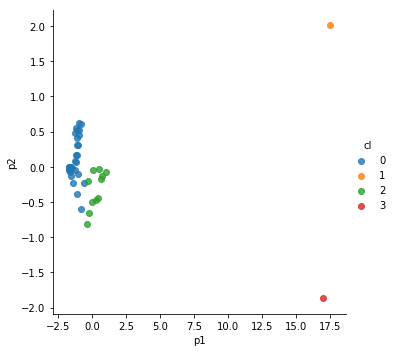

In [96]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='cl')

### Perfilamiento de los datos

In [97]:
Xs.groupby('cl').mean()

,Población de 18 años y más,Sin educación superior,Tecnico1,Tecnico2,"Tecnico3,4",No especificado,Profesional1,Profesional2,Profesional3,Profesional4,Profesional5,Profesional6,No especificado.1,Maestría,Doctorado,No especificado.2
cl,,,,,,,,,,,,,,,,
0,-0.318994,-0.313575,-0.237837,-0.309273,-0.350186,-0.335398,-0.216320,-0.250405,-0.290996,-0.361773,-0.373913,-0.365226,-0.352059,-0.379495,-0.335854,-0.305910
1,4.613483,4.661997,4.730443,5.065017,5.235690,5.061647,4.188874,4.128248,4.526146,4.546658,3.852105,3.557237,4.132376,3.875067,3.055628,4.683072
2,0.041040,0.026093,-0.155914,0.032657,0.159260,0.102422,-0.217410,-0.131980,-0.028681,0.169818,0.208662,0.189456,0.138048,0.223704,0.125403,0.009828
3,4.185911,4.144671,3.881873,3.544691,3.167849,3.538249,4.475920,4.585290,4.228215,4.076756,4.696093,4.950310,4.558793,4.669542,5.304704,4.080214
